In [ ]:
#Саватюгина Ю.Б. ИУ5-21М Вариант 6 (задача1 - 6, задача2 - 26)

In [51]:
import pandas as pd
#использую датасет с данными о стоимости золота
df = pd.read_csv('gold.csv')
df.info()
#видим, что в датасете присутствуют пропуски в столбце price
#(847 записей, не нулевых в Price 818 => присутствуют пустые значения)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   818 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [53]:
#подтверждаем догадки
df.isnull().sum()

Date      0
Price    29
dtype: int64

In [54]:
#находим медиану столбца price 
#записываем с соотв. переменную
price_median = df['Price'].median()
print(price_median)

328.6005


In [55]:
df.fillna(price_median)

,Date,Price
0,1950-01,34.7300
1,1950-02,328.6005
2,1950-03,34.7300
3,1950-04,34.7300
4,1950-05,328.6005
...,...,...
842,2020-03,1593.7640
843,2020-04,1680.0300
844,2020-05,1715.6970
845,2020-06,1734.0320


In [56]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())

    return lower_boundary, upper_boundary    

In [58]:
#Вычисления верхней и нижней границы выбросов
get_outlier_boundaries(df, 'Price')
print(lower_boundary)   
print(upper_boundary)  
 

-942.0751367566513
1798.702684433913


In [59]:
x_col_list = ['Price']

In [60]:
for col in x_col_list:    
    df['Price'] = np.where(df['Price'] > upper_boundary, upper_boundary, 
                                 np.where(df['Price'] < lower_boundary, lower_boundary, df['Price']))
   

Text(0, 0.5, 'Price')

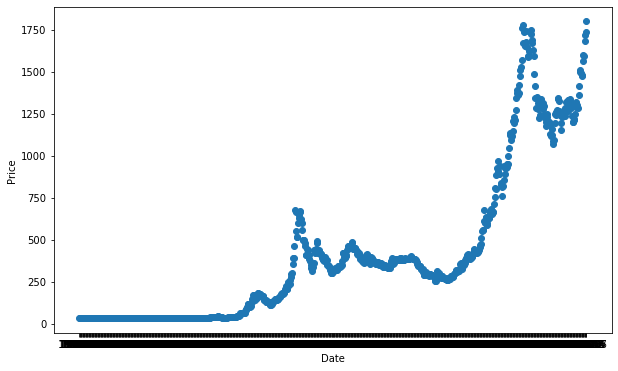

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Date'], y = df['Price'])
plt.xlabel("Date")
plt.ylabel("Price")


In [62]:
#Диаграмма рессеяния
plt.show()